In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from data_gmm import *
from plots import *
import math
from torch.distributions.uniform import Uniform

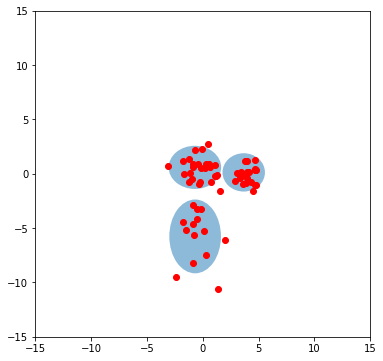

0


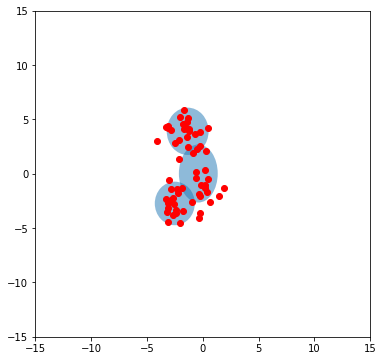

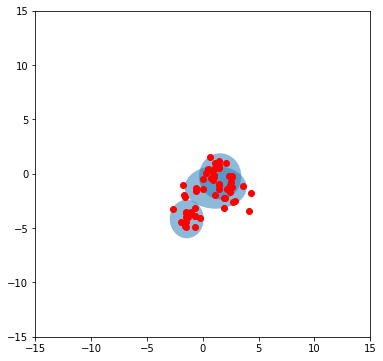

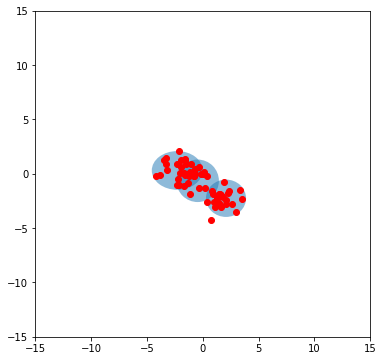

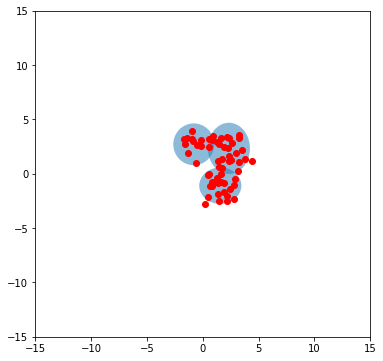

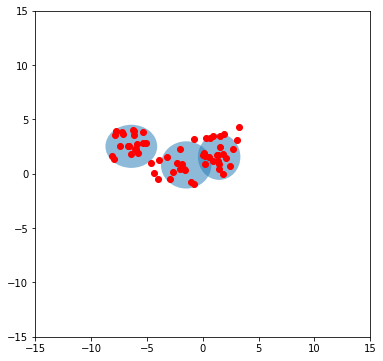

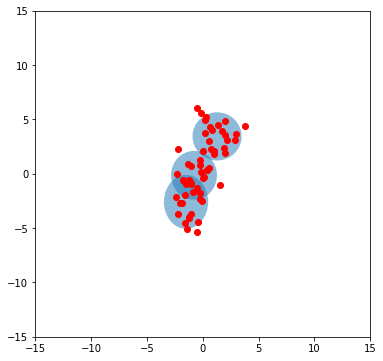

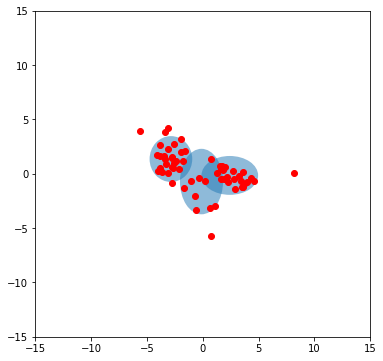

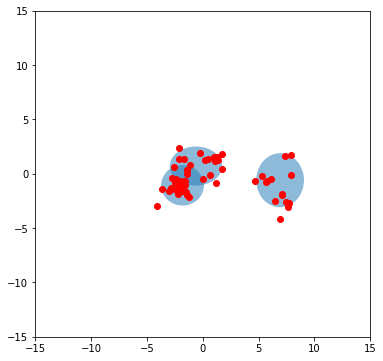

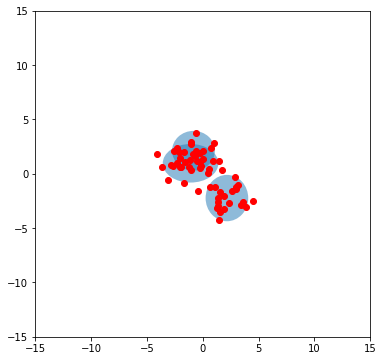

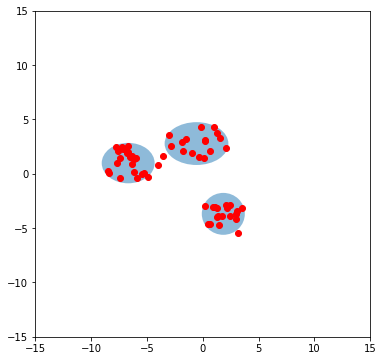

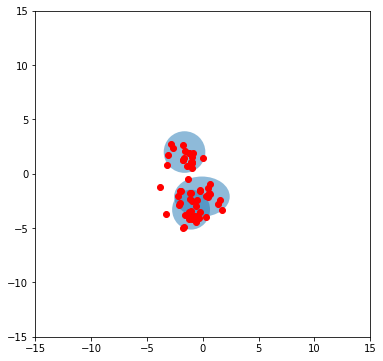

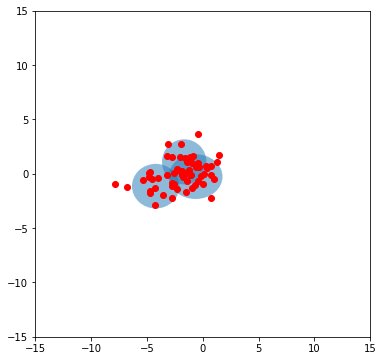

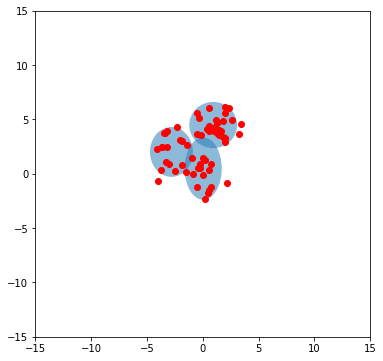

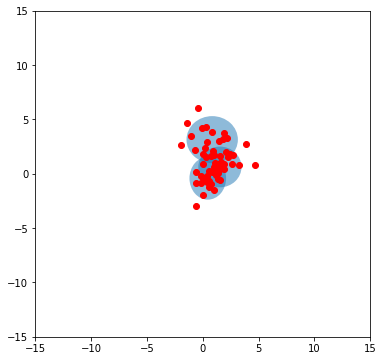

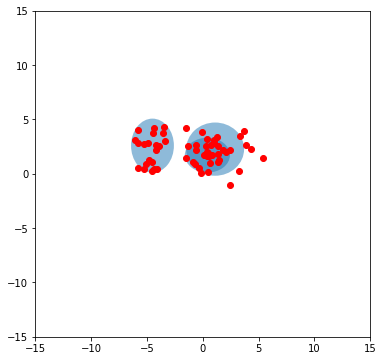

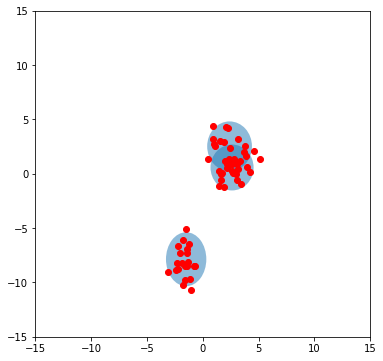

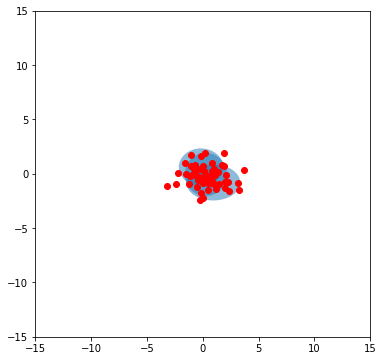

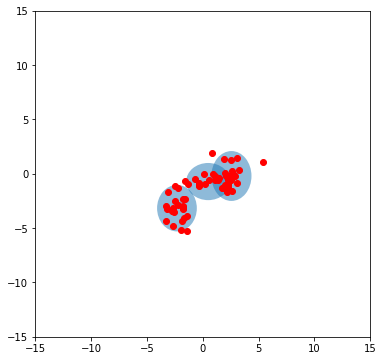

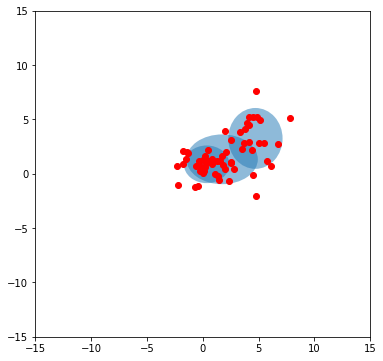

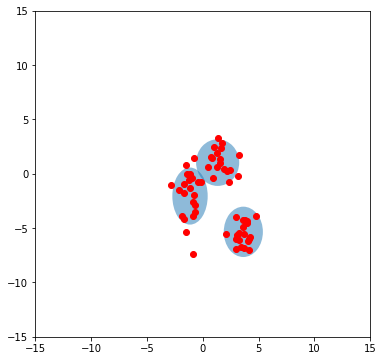

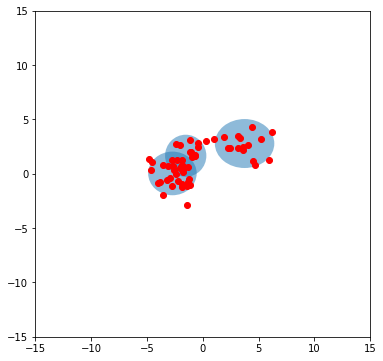

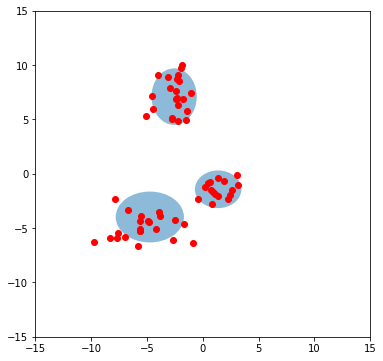

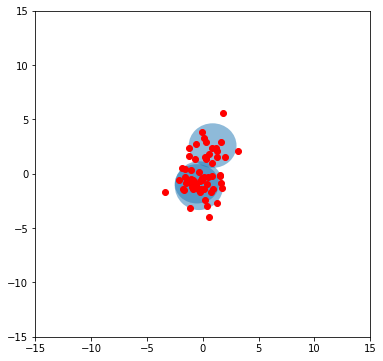

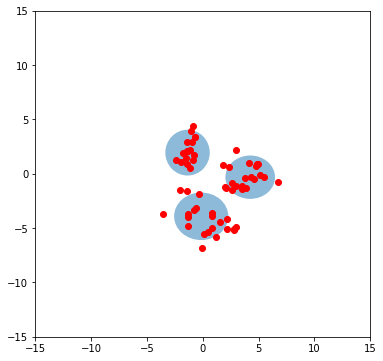

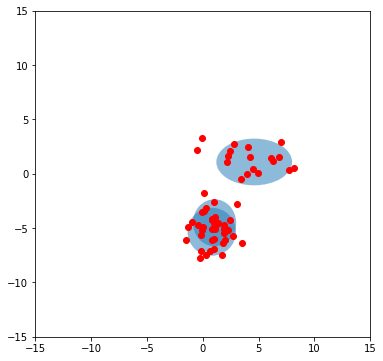

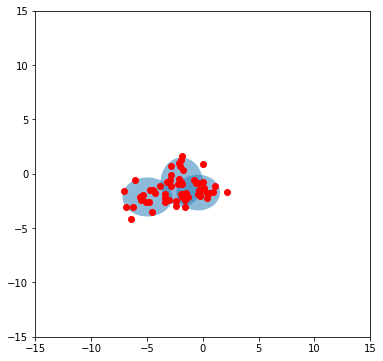

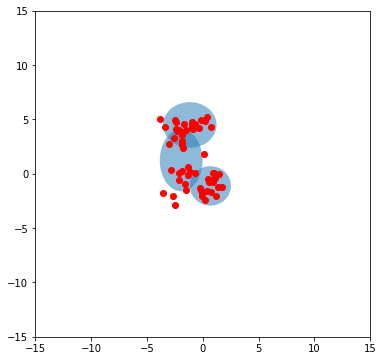

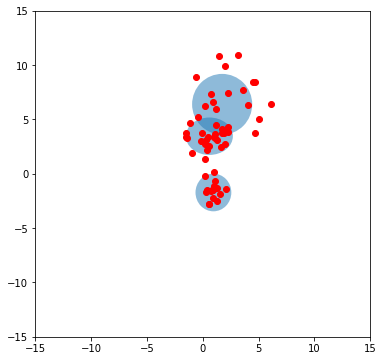

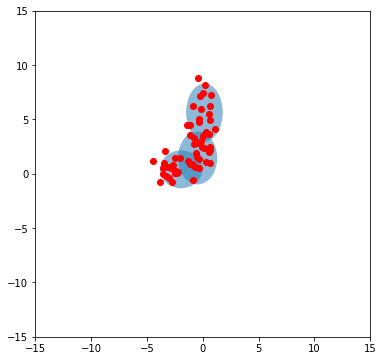

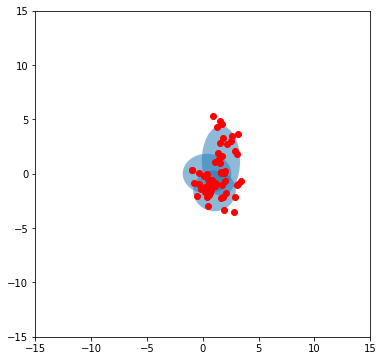

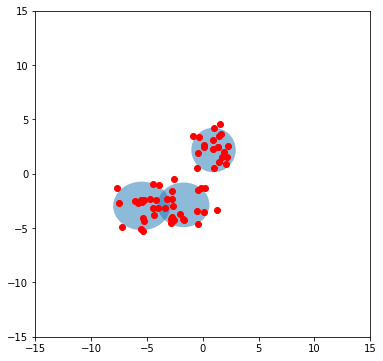

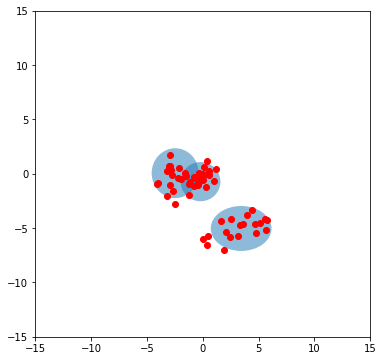

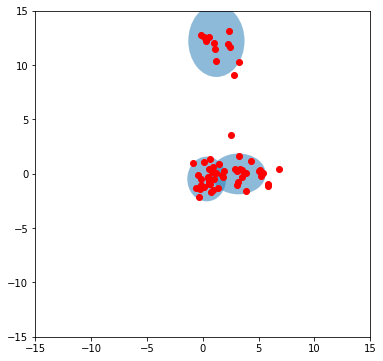

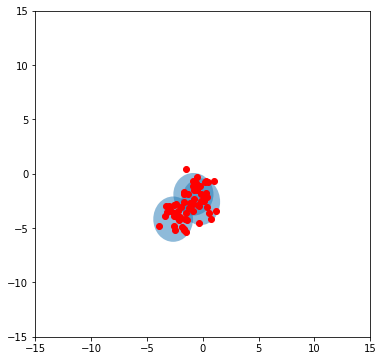

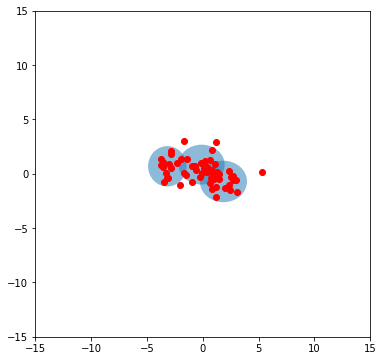

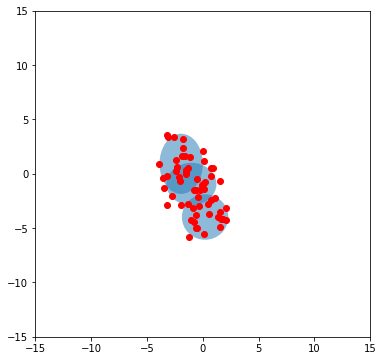

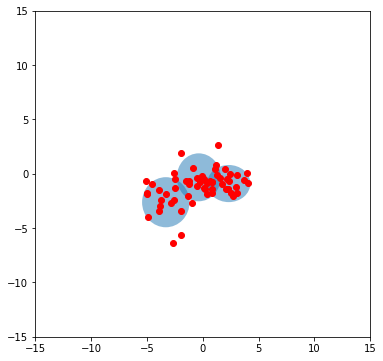

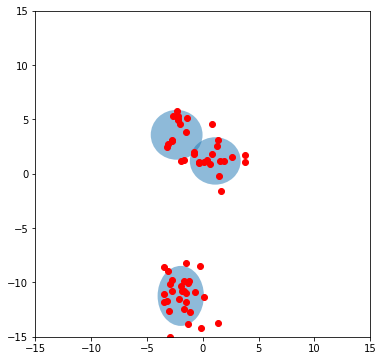

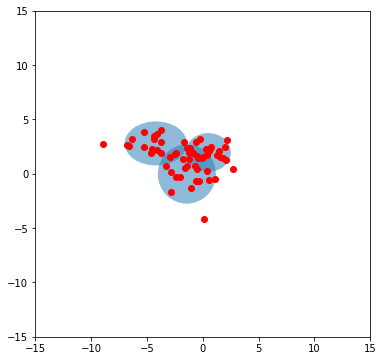

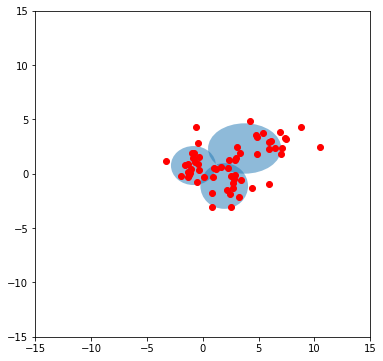

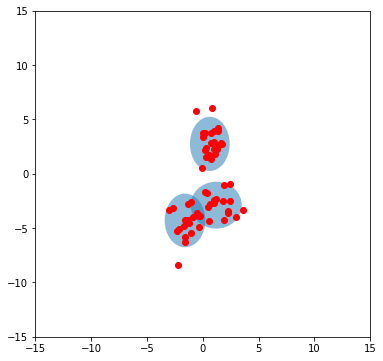

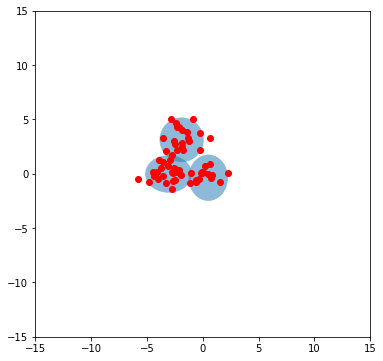

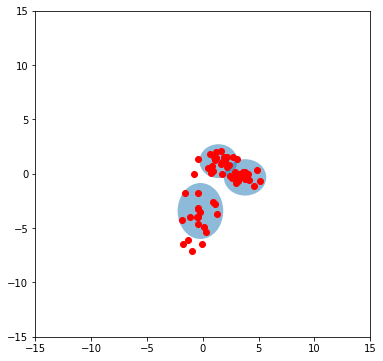

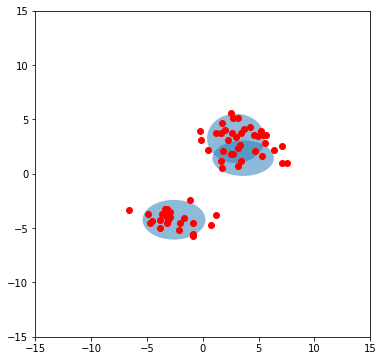

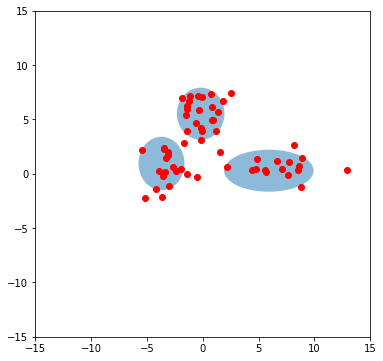

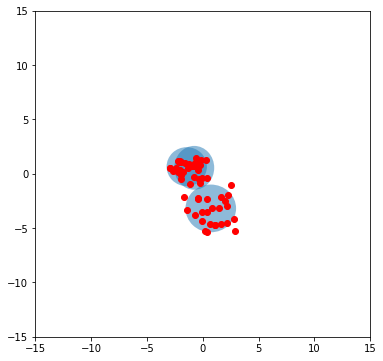

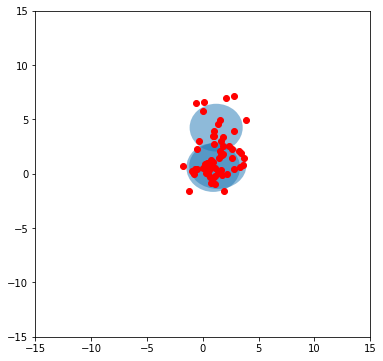

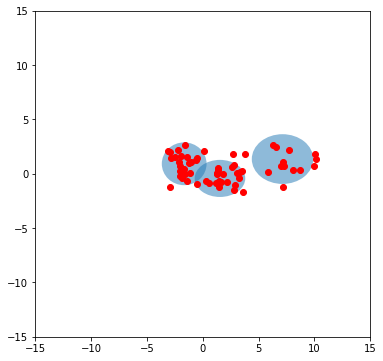

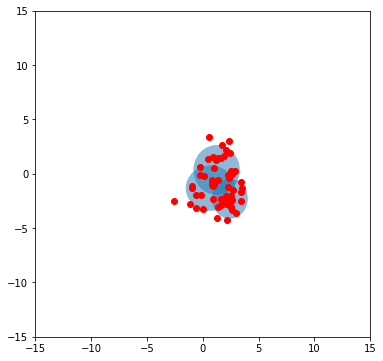

In [2]:
T = 60
K = 3
D = 2
num_seqs = 50

OBS = np.zeros((num_seqs, T, D))
STATES = np.zeros((num_seqs, T, K))
OBS_MU = np.zeros((num_seqs, K, D))
OBS_SIGMA = np.zeros((num_seqs, K, D)) ## diagonal covarince
for n in range(num_seqs):
    ind = Uniform(0, 2*math.pi).sample().item()
    obs, obs_mu, obs_sigma, states, Pi = sampling_gmm_conjugate(T, K, D)
    covs_full = torch.zeros((K, D, D))
    for k in range(K):
        covs_full[k] = torch.diag(obs_sigma[k])
    plot_clusters(obs, obs_mu, covs_full, K)
    OBS[n] = obs.data.numpy()
    STATES[n] = states.data.numpy()
    OBS_MU[n] = obs_mu.data.numpy()
    OBS_SIGMA[n] = obs_sigma.data.numpy()
    if n % 1000 == 0:
        print(n)

In [ ]:
np.save('gmm_dataset_conjugate/obs', OBS)
np.save('gmm_dataset_conjugate/states', STATES)
np.save('gmm_dataset_conjugate/obs_mu', OBS_MU)
np.save('gmm_dataset_conjugate/obs_sigma', OBS_SIGMA)
np.save('gmm_dataset_conjugate/init', Pi.data.numpy())

In [ ]:
plot_clusters(Y, mus_true, covs_true)

In [ ]:
samples = Gamma(torch.ones(D)*2, torch.ones(D)*3).sample((1000,))
# samples = Gamma(torch.ones(D)*3, torch.ones(D)*3).sample((1000,))

In [ ]:
plt.scatter(1./ torch.sqrt(samples).data.numpy()[:, 0], 1. / torch.sqrt(samples).data.numpy()[:, 1])
plt.xlim([0, 10])
plt.ylim([0, 10])

In [ ]:
mus_true = torch.zeros((K, D)).float()
for k in range(K):
    if k == 0 :
    mus_true[k] = Uniform(0, boundary).sample((2,)) * torch.from_numpy(np.random.choice([-1, 1], 2)).float()


In [ ]:
torch.norm(mus_true - next_mus, dim=-1)

In [ ]:
torch.norm(next_mus)